In [2]:
# import laibry:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# import Dataset : 
df = pd.read_csv(r"E:\Finale year Project\Diascan\diabetes_dataset.csv")
df.head()

,Patient_ID,Age,BMI,Fasting_Glucose,HbA1c,C_Peptide,Insulin_Level,Autoantibody_Presence,Diabetes_Type
0,1,61,23.7,172.3,8.9,1.80,4.1,0,NaN
1,2,24,39.9,173.7,7.5,3.73,4.2,0,2.0
2,3,70,39.2,201.7,9.7,5.48,2.1,0,2.0
3,4,30,30.3,93.0,5.9,0.92,29.1,0,1.0
4,5,33,37.4,115.0,9.7,0.69,2.1,0,1.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Patient_ID             200 non-null    int64  
 1   Age                    200 non-null    int64  
 2   BMI                    200 non-null    float64
 3   Fasting_Glucose        200 non-null    float64
 4   HbA1c                  200 non-null    float64
 5   C_Peptide              200 non-null    float64
 6   Insulin_Level          200 non-null    float64
 7   Autoantibody_Presence  200 non-null    int64  
 8   Diabetes_Type          129 non-null    float64
dtypes: float64(6), int64(3)
memory usage: 14.2 KB


In [5]:
#check the value are Null or not : 
df.isnull().head()
#count the num of null values :
df.isnull().sum()


Patient_ID                0
Age                       0
BMI                       0
Fasting_Glucose           0
HbA1c                     0
C_Peptide                 0
Insulin_Level             0
Autoantibody_Presence     0
Diabetes_Type            71
dtype: int64

In [6]:
#Drop Missing Value: 
df.dropna().head(10)

,Patient_ID,Age,BMI,Fasting_Glucose,HbA1c,C_Peptide,Insulin_Level,Autoantibody_Presence,Diabetes_Type
1,2,24,39.9,173.7,7.5,3.73,4.2,0,2.0
2,3,70,39.2,201.7,9.7,5.48,2.1,0,2.0
3,4,30,30.3,93.0,5.9,0.92,29.1,0,1.0
4,5,33,37.4,115.0,9.7,0.69,2.1,0,1.0
6,7,31,24.1,226.1,11.1,4.38,10.8,1,1.0
7,8,62,33.4,171.1,8.4,3.60,24.6,1,1.0
8,9,11,36.6,112.9,11.8,0.70,28.9,0,1.0
9,10,39,36.8,192.4,9.0,5.52,24.1,0,2.0
10,11,47,26.9,203.2,6.2,4.76,21.3,0,2.0
11,12,11,37.5,112.9,10.7,0.24,16.6,0,1.0


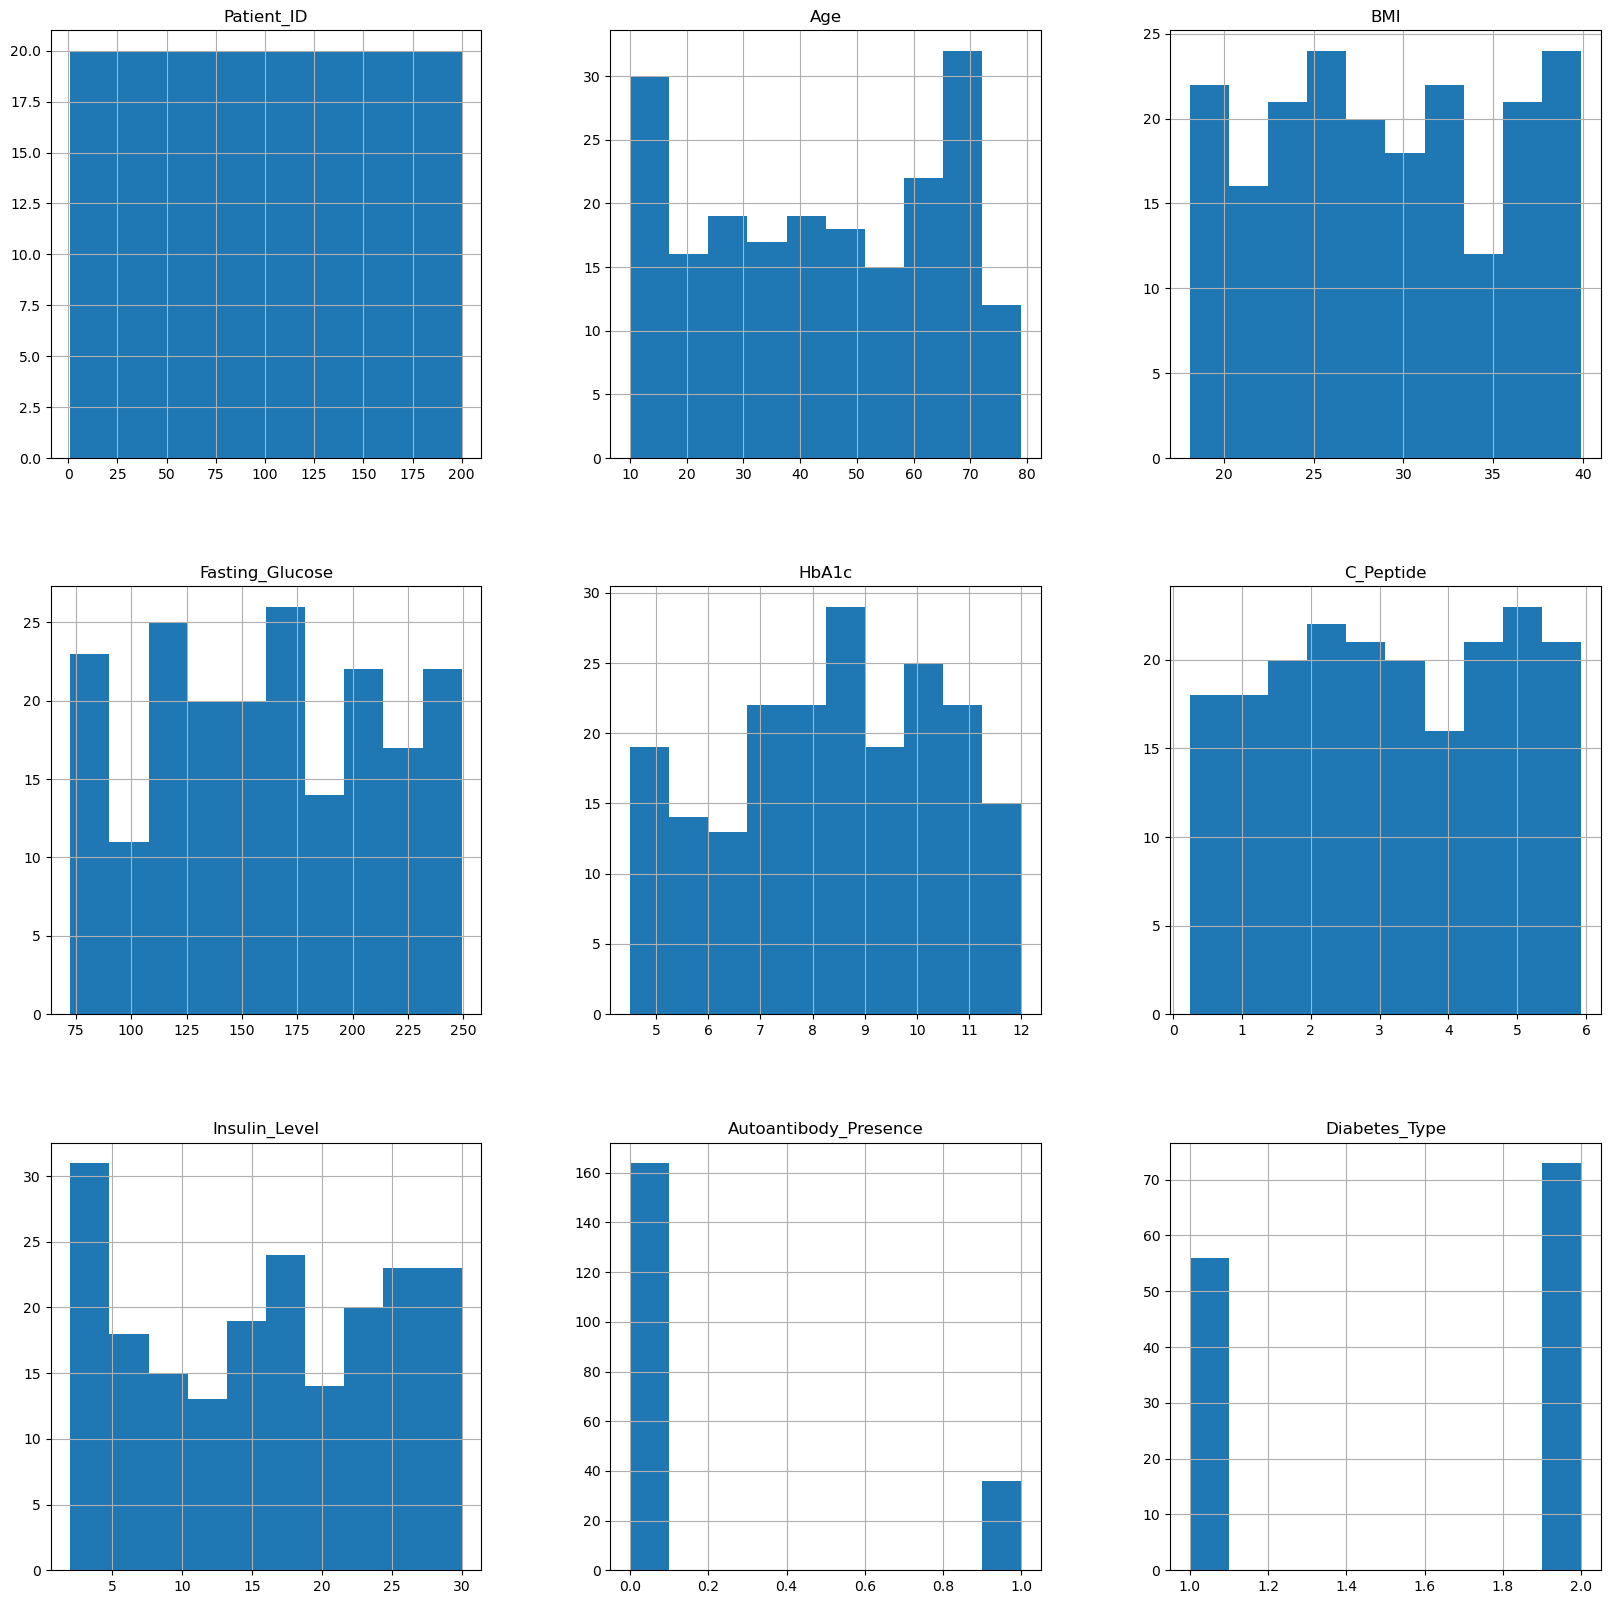

In [7]:
#Visual represantaion
p = df.hist(figsize = (20,20))

# PreProcesing Part : 

In [8]:
#drop  rows with missing target values 
df = df.dropna(subset=["Diabetes_Type"])

#Convert Diabetes_Type : Type 1 = 0 , 2 = 1 :
df["Diabetes_Type"] = df["Diabetes_Type"].replace({1:0,2:1})
#Selection of Features and Target  :
X = df[["Age","BMI","Fasting_Glucose","HbA1c","C_Peptide","Insulin_Level","Autoantibody_Presence"]] #based on dataset
y = df["Diabetes_Type"]  # 0 = Type 1, 1 = Type 2


In [9]:
#split the data into trainig and test data :
from sklearn.model_selection import train_test_split   #train_test_split is function 

In [10]:
# Split data into training (80%) and testing (20%) :
# here 'X' is feature dataset.
# here 'y' is target var.
#here  test_size = 0.2 show , 20% data will used for testing and remainin will be used for trainig.
# here random_state = 42 show you will get the same split of the data into training and testing sets.


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
#Import the Model: 
import xgboost as xgb

# Define the XGBoost Classifier :
# n_estimators means Number of decision trees (boosting rounds) means model build 100 decision trees in Sequence .
# learning_rate means How much the model adjusts per boosting step.
# max_depth means Maximum depth of each decision tree.
# random_state means same random split each time.
model = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=4, random_state=42)

# Train the model :
model.fit(X_train, y_train)

# Make predictions :
y_pred = model.predict(X_test)




In [ ]:
# accuracy_score is function for  measure model accuracy.
from sklearn.metrics import accuracy_score


# Evaluate accuracy :
# y_test : actual correct labels from test data.
# y_pred : predicted lables from the model.
# work : compare the predicted value(y_pred) with Actual value(y_test).
accuracy = accuracy_score(y_test, y_pred)

# accuracy * 100 converts it to a percentage.
# .2f ensures only 2 decimal places.
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Model Accuracy: 92.31%


# Save & Load Model for  Predictions :

In [ ]:
import joblib  # For saving the model

# Save the trained model
joblib.dump(model, "diabetes_type_model.pkl")

# Load model when needed
loaded_model = joblib.load("diabetes_type_model.pkl")

# Example prediction
sample_data = [[50, 31.5, 190, 7.8 ,3.5 , 110 ,1]]  # Age, BMI, Glucose, C-Peptide
prediction = loaded_model.predict(sample_data)
print("Predicted Diabetes Type:", "Type 1" if prediction[0] == 0 else "Type 2")


Predicted Diabetes Type: Type 1
